# Численные методы решения систем линейных уравнений

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Метод итерации

In [2]:
def iterative_method(A, b):
    alpha = -A / A.diagonal().reshape(A.shape[0], 1)
    np.fill_diagonal(alpha, 0)

    beta = b / A.diagonal()

    results_list = []
    iterations = 0
    
    x_prev = b
    while (1):
        x = beta + np.dot(alpha, x_prev)
        
        results_list.append(x)
        iterations += 1
        
        if np.sum(np.abs(x - x_prev) / np.abs(x)) == 0:
            return (x, iterations, results_list)
        else:
            x_prev = x

## Метод Зейделя

In [3]:
def seidel_method(A, b):
    C = np.dot(A.T, A)
    d = np.dot(A.T, b)
    
    alpha = -C / C.diagonal().reshape(C.shape[0], 1)
    np.fill_diagonal(alpha, 0)

    beta = d / C.diagonal()
    
    L = np.tril(alpha)
    U = np.triu(alpha)
    E = np.eye(alpha.shape[0])
    
    results_list = []
    iterations = 0
    
    x_prev = b
    while (1):
        first = np.dot(np.linalg.inv(E - L), U) 
        second = np.dot(np.linalg.inv(E - L), beta)
        x = np.dot(first, x_prev) + second
        
        results_list.append(x)
        iterations += 1

        if np.sum(np.abs(x - x_prev) / np.abs(x)) == 0:
            return (x, iterations, results_list)
        else:
            x_prev = x

## Проверка

In [4]:
A = np.array([[0.58, 0.29, 0.05],
              [0.05, 0.34, 0.1],
              [0.2, 0.44, 0.81]], dtype=float)

b = np.array([0.02, 0.32, 0.74], dtype=float)

### Метод итерации

In [5]:
result = iterative_method(A, b)
answer, iterations, results_list = result[0], result[1], result[2]

In [6]:
print('Результат:', answer)

Результат: [-0.43360563  0.83875936  0.565021  ]


In [7]:
line1 = [each_result[0] for each_result in results_list]
line2 = [each_result[1] for each_result in results_list]
line3 = [each_result[2] for each_result in results_list]

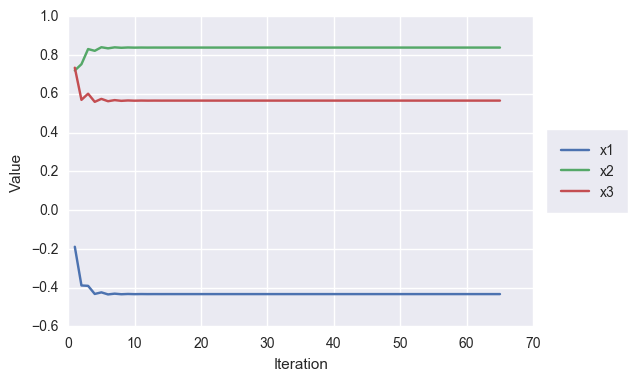

In [8]:
fig, ax = plt.subplots()
plt.plot(np.arange(1, iterations + 1), line1, label='x1')
plt.plot(np.arange(1, iterations + 1), line2, label='x2')
plt.plot(np.arange(1, iterations + 1), line3, label='x3')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)
ax.set_ylabel('Value')
trash = ax.set_xlabel('Iteration')

### Метод Зейделя

In [9]:
result = seidel_method(A, b)
answer, iterations, results_list = result[0], result[1], result[2]

In [10]:
print('Результат:', answer)

Результат: [-0.43360563  0.83875936  0.565021  ]


In [11]:
line1 = [each_result[0] for each_result in results_list]
line2 = [each_result[1] for each_result in results_list]
line3 = [each_result[2] for each_result in results_list]

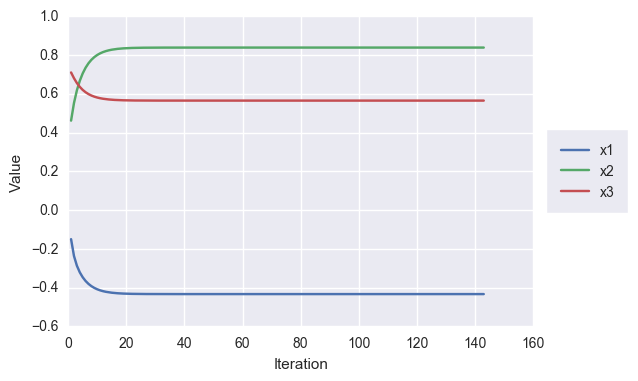

In [12]:
fig, ax = plt.subplots()
plt.plot(np.arange(1, iterations + 1), line1, label='x1')
plt.plot(np.arange(1, iterations + 1), line2, label='x2')
plt.plot(np.arange(1, iterations + 1), line3, label='x3')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)
ax.set_ylabel('Value')
trash = ax.set_xlabel('Iteration')